## Twitter Suspensions after the 2020 Election

Show, using crosstabulation, that accounts that shared `#Trump2020` during the election were about 4.4 times more likely to be subsequently suspended than the accounts that shared `#VoteBidenHarris2020` (relevant columns: `politics_hashtag` and `suspended`). Then perform a $\chi^2$ test on the contingency table and explain the results.

In [88]:
import pandas as pd

from scipy.stats import chi2_contingency
from scipy.stats import zscore
from scipy.stats import ttest_ind

import seaborn as sns
import matplotlib.pyplot as plt




In [89]:
mosleh_df = pd.read_csv('mosleh_et_al_data.csv')
mosleh_df

,politics_sites2,politics_sites1,politics_followed,lowqual_pr2019_crowd,lowqual_pr2019_fc,lowqual_afm,lowqual_mbfc,lowqual_lasser2019,suspended,politics_hashtag,...,valence_neg,valence_neu,valence_pos,politics_sites2_ideo_std,hashtag_ideo_std,barbera_std,politics_sites1_std,repeated_tweet_count,freq_pr_1h,bad_domain_count
0,-0.231902,-1.168745,-0.080295,0.598883,0.279221,0.185315,0.292807,0.350000,0,0,...,0.109935,0.813230,0.076835,0.274317,0.00000,0.909460,69,86.0,30,7
1,0.405261,1.060905,2.296375,0.774873,0.848639,0.614156,0.513147,0.975087,0,1,...,0.115985,0.793715,0.090250,0.351800,0.00000,0.157056,623,133.0,26,20
2,-0.171067,-0.500076,-2.312730,0.548727,0.242347,0.130950,0.242445,0.300000,0,0,...,0.085765,0.817340,0.096915,0.279591,0.00000,0.445349,32,3.0,3,6
3,-0.085814,-0.748035,-1.507481,0.611501,0.360119,0.180055,0.277793,0.316038,0,0,...,0.108680,0.781135,0.110190,0.290277,0.00000,0.256665,55,104.0,29,22
4,0.595367,1.347730,2.010573,0.700217,0.698661,0.430655,0.554609,0.763889,0,1,...,0.065145,0.860550,0.074320,0.300823,0.00000,0.431149,37,36.0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,-0.115066,-0.604443,NaN,0.559728,0.257015,0.167228,0.473955,0.336758,1,0,...,0.087090,0.863170,0.049770,0.206279,0.00000,NaN,134,724.0,22,3
8996,0.499673,1.019845,1.689321,0.703698,0.720918,0.399594,0.568832,0.772321,1,1,...,0.067430,0.843105,0.089495,0.300414,0.00000,0.890596,66,71.0,27,14
8997,-0.214569,-0.925605,NaN,0.627648,0.400227,0.217915,0.303897,0.355212,1,0,...,0.083680,0.849685,0.066635,0.283650,0.57735,NaN,240,99.0,22,46
8998,0.424927,0.925060,1.525494,0.764551,0.808780,0.388632,0.462972,0.863636,1,1,...,0.112050,0.808630,0.079320,0.332652,0.00000,0.900122,32,210.0,15,22


In [90]:
cross_df = mosleh_df[['politics_hashtag', 'suspended']]
cross_df

,politics_hashtag,suspended
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0
...,...,...
8995,0,1
8996,1,1
8997,0,1
8998,1,1


In [91]:
crosstab = pd.crosstab(cross_df['politics_hashtag'], cross_df['suspended'])
crosstab


suspended,0,1
politics_hashtag,,
0,4295,200
1,3623,882


In [92]:
suspension_rates = crosstab[1] / crosstab.sum(axis=1)
likelihood_ratio = suspension_rates[1] / suspension_rates[0]
likelihood_ratio


np.float64(4.400210876803551)

In [93]:

chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"Chi-Square: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")


Chi-Square: 485.46706126582285
p-value: 1.3808204811294585e-107
Degrees of Freedom: 1
Expected Frequencies: 
[[3954.60111111  540.39888889]
 [3963.39888889  541.60111111]]


chi square high meaning strong assosiation,
p value < 0.05 so result is statistically significant


## Distributions of Relative Frequency of Low Quality

Plot the distributions of low-quality sharing as determined by eight professional fact-checkers (column `lowqual_pr2019_fc`), grouped by `politics_hashtag`. The $x$-axis should be standardized using z-scores. The distributions should look like the following figure.

In [94]:
lowqual_fc_df = mosleh_df['lowqual_pr2019_fc']
lowqual_fc_df = lowqual_fc_df.fillna(lowqual_fc_df.mean())  # Replace NaNs with mean

zscore_res = zscore(lowqual_fc_df)
mosleh_df['zscores'] = zscore_res


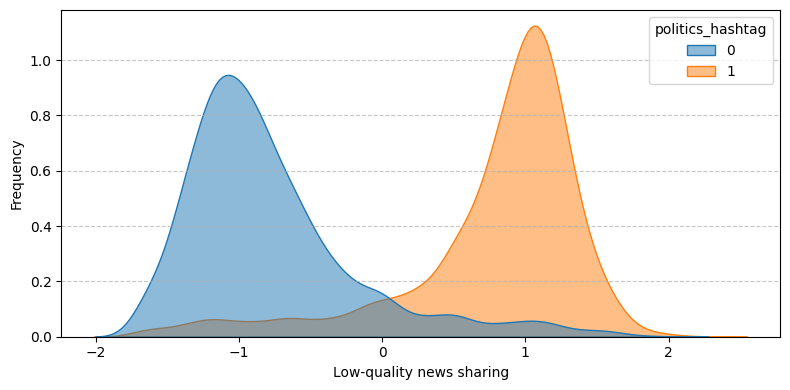

In [95]:
plt.figure(figsize=(8, 4))

sns.kdeplot(
    data=mosleh_df,
    x='zscores',
    hue='politics_hashtag',
    fill=True,
    alpha=0.5,
    common_norm=False
)

plt.title("", fontsize=14) 
plt.xlabel("Low-quality news sharing", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Having done, that, proceed to do the same with low-quality sharing as determined by crowdsourcing from 971 participants from the USA (column `lowqual_pr2019_crowd`). The distributions should look like the following figure.

In [96]:
lowqual_crowd_df = mosleh_df['lowqual_pr2019_crowd']
lowqual_crowd_df = lowqual_crowd_df.fillna(lowqual_crowd_df.mean())  # Replace NaNs with mean

zscore_res = zscore(lowqual_crowd_df)
mosleh_df['zscores_crowd'] = zscore_res

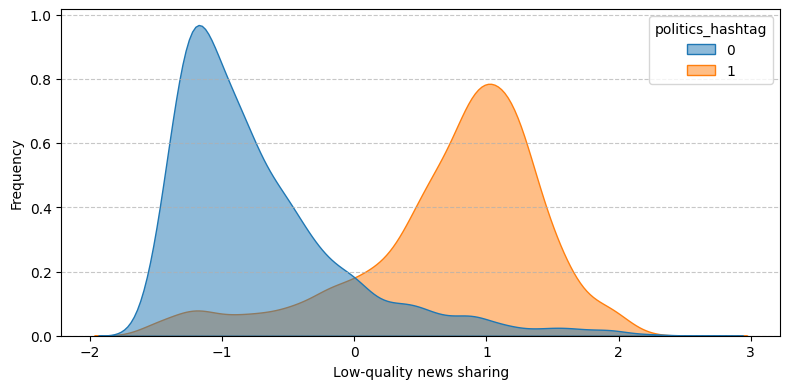

In [97]:
plt.figure(figsize=(8, 4))

sns.kdeplot(
    data=mosleh_df,
    x='zscores_crowd',
    hue='politics_hashtag',
    fill=True,
    alpha=0.5,
    common_norm=False)

plt.title("", fontsize=14)  # No title
plt.xlabel("Low-quality news sharing", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Show the results of the t-statistic for these two groups as well.

In [100]:

# Separate the data by politics_hashtag groups
group_0 = mosleh_df.loc[mosleh_df['politics_hashtag'] == 0, 'zscores']
group_1 = mosleh_df.loc[mosleh_df['politics_hashtag'] == 1, 'zscores']

# Perform an independent two-sample t-test
t_stat, p_value = ttest_ind(group_0, group_1, equal_var=False)  # Use Welch's t-test (unequal variance)

# Print the results
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4e}")

T-Statistic: -118.6514
P-Value: 0.0000e+00


## Low-quality News Sharing on Twitter

We will proceed to examine low-quality news sharing on Twitter on a more quantitave manner, using the t-test. In particular, we will use the t-test based on groups of users depending on their `politics_hashtag` and various assessments of low-quality news sharing. We will quantify the effect size of the t-test using Cohen's $d$ and Hedges' $g$.

Cohen's $d$ is defined as the difference between two means divided by a standard deviation for the data, i.e.:

$$ d = \frac{\bar{x}_{1} - \bar{x}_{2}}{s} $$

$s$, the pooled standard deviation for two independent samples is defined as:

$$ s=\sqrt{\frac{(n_{1}-1)s_{1}^{2}+(n_{2}-1)s_{2}^{2}}{n_{1}+n_{2}-2}} $$

where $n_1$, $n_2$ is the size of each sample and the variance of $s_1$ is defined as:

$$ s_{1}^{2}=\frac{1}{n_{1}-1} \sum _{i=1}^{n_{1}}(x_{1,i}-{\bar {x}}_{1})^{2} $$

with the variance of $s_2$ defined similarly. The values of Cohen's $d$ can be interpreted as follows:

| Effect Size | $d$  |
|-------------|------|
| Very small  | 0.01 |
| Small	      | 0.20 |
| Medium	  | 0.50 |
| Large	      | 0.80 |
| Very large  | 1.20 |
| Huge        | 2.00 |

Hedges' $g$ corrects Cohen's $d$ for bias in small sample sizes and is defined as:

$$ 1 - \bigg(\frac{3}{4  (n_1 + n_2) - 9)}\bigg)d $$

You will perform a t-test statistic and report Cohen's $d$ and Hedges' $g$ for the following, grouped by `politics_hashtag`.

* `lowqual_pr2019_fc` (sites rated by fact-checkers)
* `lowqual_afm` (sites rated by Ad Fontes media, <https://adfontesmedia.com/>)
* `lowqual_mbfc` (sites rated by Media Bias/Fact Check, <https://mediabiasfactcheck.com/>)
* `lowqual_lasser2019` (sites rated by Laser et al., https://doi.org/10.1093/pnasnexus/pgac186)
* `lowqual_pr2019_crowd` (sites rated by crowdsourcing 971 participants from the USA)
* `lowqual_pr2019_crowdrep` (sites rated by the republicans among the 971 participants of above)

In [102]:
from scipy.stats import ttest_ind
import numpy as np

# Define the variables to analyze
variables = [
    'lowqual_pr2019_fc', 
    'lowqual_afm', 
    'lowqual_mbfc', 
    'lowqual_lasser2019', 
    'lowqual_pr2019_crowd', 
    'lowqual_pr2019_crowdrep'
]

# Initialize results list
results = []

# Loop over each variable
for var in variables:
    # Separate the groups
    group_0 = mosleh_df.loc[mosleh_df['politics_hashtag'] == 0, var].dropna()
    group_1 = mosleh_df.loc[mosleh_df['politics_hashtag'] == 1, var].dropna()
    
    # Perform t-test
    t_stat, p_val = ttest_ind(group_0, group_1, equal_var=False)  # Welch's t-test
    
    # Calculate pooled standard deviation
    n1, n2 = len(group_0), len(group_1)
    s1, s2 = np.std(group_0, ddof=1), np.std(group_1, ddof=1)
    pooled_std = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
    
    # Calculate Cohen's d
    mean_diff = group_1.mean() - group_0.mean()
    cohen_d = mean_diff / pooled_std
    
    # Calculate Hedges' g
    correction = 1 - (3 / (4 * (n1 + n2) - 9))
    hedges_g = cohen_d * correction
    
    # Append results
    results.append({
        'Variable': var,
        'T-Statistic': t_stat,
        'P-Value': p_val,
        'Cohen\'s d': cohen_d,
        'Hedges\' g': hedges_g
    })

# Convert results to DataFrame for display
import pandas as pd
results_df = pd.DataFrame(results)

# Print results
print(results_df)


                  Variable  T-Statistic  P-Value  Cohen's d  Hedges' g
0        lowqual_pr2019_fc  -119.246476      0.0   2.521188   2.520977
1              lowqual_afm  -102.711200      0.0   2.164878   2.164698
2             lowqual_mbfc   -97.584148      0.0   2.057540   2.057369
3       lowqual_lasser2019  -102.679384      0.0   2.163831   2.163650
4     lowqual_pr2019_crowd  -102.501955      0.0   2.166782   2.166601
5  lowqual_pr2019_crowdrep   -61.083019      0.0   1.291464   1.291356


### Sharing Lower-quality News Sources and Conservative Ideology

To see if there is a correlation between lower-quality news sources and conservative ideology, you will perform pairwise correlations between, on the one hand:

 * `lowqual_pr2019_fc`
 * `lowqual_lasser2019`
 * `lowqual_mbfc`
 * `lowqual_afm`
 * `lowqual_pr2019_crowd`
 * `lowqual_pr2019_crowdrep`

and on the other hand:

 * `politics_followed` (political ideology estimated on the basis of Twitter accounts user followed)
 * `politics_hashtag`
 * `politics_sites1` (political ideology estimated on the basis of the news sites the users share, <https://doi.org/10.1126/science.aau2706>)
 * `politics_sites2` (political ideology estimated on the basis of the news sites ther users share, <https://doi.org/10.31219/osf.io/ch8gj>)

You should display the results in a heatmap like the following:

In [104]:
# Select the columns for correlation
cols_news = ['lowqual_pr2019_fc', 'lowqual_lasser2019', 'lowqual_mbfc', 
             'lowqual_afm', 'lowqual_pr2019_crowd', 'lowqual_pr2019_crowdrep']
cols_ideology = ['politics_followed', 'politics_hashtag', 
                 'politics_sites1', 'politics_sites2']

# Subset the dataframe for these columns
corr_df = mosleh_df[cols_news + cols_ideology]

# Compute the correlation matrix
correlation_matrix = corr_df.corr()

# Display the result
print(correlation_matrix)


                         lowqual_pr2019_fc  lowqual_lasser2019  lowqual_mbfc  \
lowqual_pr2019_fc                 1.000000            0.859959      0.755974   
lowqual_lasser2019                0.859959            1.000000      0.803178   
lowqual_mbfc                      0.755974            0.803178      1.000000   
lowqual_afm                       0.881299            0.900902      0.784055   
lowqual_pr2019_crowd              0.964348            0.840018      0.713212   
lowqual_pr2019_crowdrep           0.789817            0.671775      0.547665   
politics_followed                 0.809501            0.777250      0.748146   
politics_hashtag                  0.783463            0.734398      0.717101   
politics_sites1                   0.876237            0.835576      0.774779   
politics_sites2                   0.854197            0.851794      0.774266   

                         lowqual_afm  lowqual_pr2019_crowd  \
lowqual_pr2019_fc           0.881299              0.96434

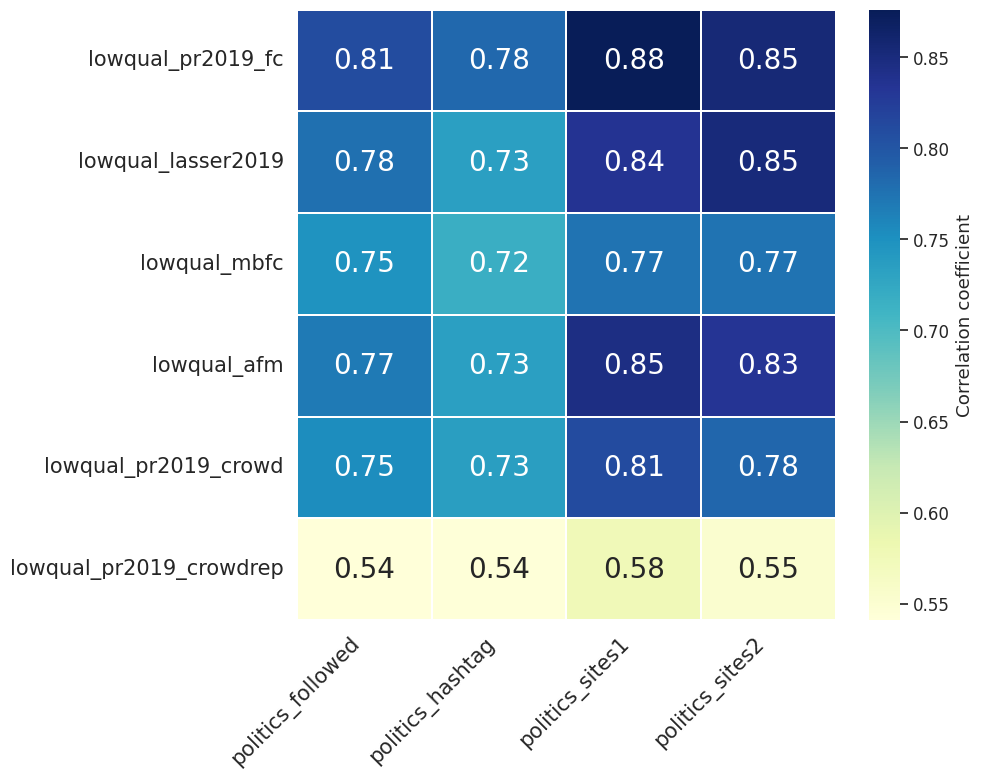

In [125]:


# Select the columns for correlation
cols_news = ['lowqual_pr2019_fc', 'lowqual_lasser2019', 'lowqual_mbfc', 
             'lowqual_afm', 'lowqual_pr2019_crowd', 'lowqual_pr2019_crowdrep']
cols_ideology = ['politics_followed', 'politics_hashtag', 
                 'politics_sites1', 'politics_sites2']

# Subset the dataframe for these columns
corr_df = mosleh_df[cols_news + cols_ideology]

# Compute the correlation matrix
correlation_matrix = corr_df.corr()

# Extract only the relevant correlation between cols_news and cols_ideology
correlation_submatrix = correlation_matrix.loc[cols_news, cols_ideology]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_submatrix, annot=True, fmt=".2f", cmap="YlGnBu", 
            cbar_kws={"label": "Correlation coefficient"}, annot_kws={"size": 20}, linewidths=0.1, linecolor='white')

# Adjust the axis labels and rotation
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(rotation=0, fontsize=15)

# Apply tight layout
plt.tight_layout()

# Show the plot
plt.show()
